In [1]:
import numpy as np
import pandas as pd
import utils

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

___
# EDA on the gold standard annotations
### Load metadata

In [2]:
# Load the dataset (full / training / test)
df = pd.read_csv("../datasets/reports_metadata.csv")
print(df.shape)
df.head()

(283, 4)


,report_id,patient_id,report_no,y_report
0,754,1,1,Negative
1,214,2,1,Positive
2,125,3,1,Negative
3,859,4,1,Negative
4,381,5,1,Negative


### Add counts for gold standard concepts and composite concepts

In [3]:
df = utils.ann2counts(df)
df.shape

(283, 27)

### Summary statistics

In [4]:
# Define fetaure names
feature_names = utils.get_feature_names("concepts") + utils.get_feature_names("relations") + utils.get_feature_names("composite")
feature_names

['ClinicalQuery',
 'FungalDescriptor',
 'Fungus',
 'Invasiveness',
 'Stain',
 'SampleType',
 'positive',
 'equivocal',
 'negative',
 'positive-rel',
 'equivocal-rel',
 'negative-rel',
 'fungal-description-rel',
 'invasiveness-rel',
 'fungus-stain-rel',
 'affirmedFungalDescriptor',
 'affirmedFungus',
 'affirmedInvasiveness',
 'affirmedStain',
 'negatedFungalDescriptor',
 'negatedFungus',
 'negatedInvasiveness',
 'negatedStain']

In [5]:
# Number of reports with no annotations
print("%d reports with no annotations of any kind." % (df[feature_names].sum(axis=1)==0).sum())
print("%d reports with no concepts." % (df[utils.get_feature_names("concepts")].sum(axis=1)==0).sum())
print("%d reports with no relations." % (df[utils.get_feature_names("relations")].sum(axis=1)==0).sum())

24 reports with no annotations of any kind.
24 reports with no concepts.
149 reports with no relations.


In [6]:
# Median number of concepts in the annotated reports
df.loc[df[utils.get_feature_names("concepts")].sum(axis=1) > 0, utils.get_feature_names("concepts")].sum(axis=1).median()

3.0

In [7]:
# Total occurences for each category
df[feature_names].sum()

ClinicalQuery                65
FungalDescriptor            282
Fungus                      106
Invasiveness                 37
Stain                       172
SampleType                  198
positive                    118
equivocal                     7
negative                    152
positive-rel                144
equivocal-rel                 9
negative-rel                201
fungal-description-rel       41
invasiveness-rel             38
fungus-stain-rel            173
affirmedFungalDescriptor    101
affirmedFungus               40
affirmedInvasiveness          1
affirmedStain                 2
negatedFungalDescriptor     138
negatedFungus                53
negatedInvasiveness           6
negatedStain                  4
dtype: int64

In [8]:
# Number of unique phrases
vocab = utils.create_vocab(df.report_id, expand=False)

Number of unique tokens in each category: [36, 67, 15, 25, 13, 55, 37, 5, 11]


In [9]:
# Lexical diversity
[print(ft, (len(vocab[ft]) / df[ft].sum()).round(2)) for ft in vocab]

ClinicalQuery 0.55
FungalDescriptor 0.24
Fungus 0.14
Invasiveness 0.68
Stain 0.08
SampleType 0.28
positive 0.31
equivocal 0.71
negative 0.07


[None, None, None, None, None, None, None, None, None]

In [10]:
def print_percentage_reports(df, units="perc"):
    if units=="perc":
        # Percentage of reports with at least one occurence
        print("Percentage of reports:")
        print((df[feature_names].astype(bool).sum(axis=0) / df.shape[0] * 100).round(1))
        
    if units=="num":
        # Number of reports with at least one occurence
        print("Number of reports:")
        print(df[feature_names].astype(bool).sum(axis=0))

In [11]:
# Number of reports with at least one occurrence
print_percentage_reports(df, "num")

Number of reports:
ClinicalQuery                53
FungalDescriptor            128
Fungus                       60
Invasiveness                 12
Stain                       100
SampleType                  179
positive                     42
equivocal                     5
negative                    104
positive-rel                 42
equivocal-rel                 5
negative-rel                104
fungal-description-rel       22
invasiveness-rel             12
fungus-stain-rel             93
affirmedFungalDescriptor     38
affirmedFungus               24
affirmedInvasiveness          1
affirmedStain                 2
negatedFungalDescriptor      96
negatedFungus                35
negatedInvasiveness           4
negatedStain                  4
dtype: int64


In [12]:
# Percentage of occurences in Positive reports
(df.loc[df.y_report=="Positive", feature_names].sum(axis=0) / df[feature_names].sum(axis=0) * 100).round(0)

ClinicalQuery                43.0
FungalDescriptor             54.0
Fungus                       58.0
Invasiveness                100.0
Stain                        28.0
SampleType                   14.0
positive                     97.0
equivocal                   100.0
negative                     14.0
positive-rel                 97.0
equivocal-rel               100.0
negative-rel                 12.0
fungal-description-rel      100.0
invasiveness-rel            100.0
fungus-stain-rel             26.0
affirmedFungalDescriptor     96.0
affirmedFungus              100.0
affirmedInvasiveness        100.0
affirmedStain               100.0
negatedFungalDescriptor       8.0
negatedFungus                15.0
negatedInvasiveness         100.0
negatedStain                  0.0
dtype: float64

In [13]:
# Total number of occurences
df[feature_names].sum().sum(), df[utils.get_feature_names('concepts')].sum().sum(), df[utils.get_feature_names('relations')].sum().sum()

(2088, 1137, 606)

In [14]:
# Average number of occurences per report
df[feature_names].mean(axis=0).round(2)

ClinicalQuery               0.23
FungalDescriptor            1.00
Fungus                      0.37
Invasiveness                0.13
Stain                       0.61
SampleType                  0.70
positive                    0.42
equivocal                   0.02
negative                    0.54
positive-rel                0.51
equivocal-rel               0.03
negative-rel                0.71
fungal-description-rel      0.14
invasiveness-rel            0.13
fungus-stain-rel            0.61
affirmedFungalDescriptor    0.36
affirmedFungus              0.14
affirmedInvasiveness        0.00
affirmedStain               0.01
negatedFungalDescriptor     0.49
negatedFungus               0.19
negatedInvasiveness         0.02
negatedStain                0.01
dtype: float64

In [15]:
# Average number of occurences in positive reports
df.loc[df.y_report=="Positive", feature_names].mean(axis=0).round(2)

ClinicalQuery               0.70
FungalDescriptor            3.78
Fungus                      1.52
Invasiveness                0.92
Stain                       1.20
SampleType                  0.68
positive                    2.85
equivocal                   0.18
negative                    0.52
positive-rel                3.50
equivocal-rel               0.22
negative-rel                0.62
fungal-description-rel      1.02
invasiveness-rel            0.95
fungus-stain-rel            1.12
affirmedFungalDescriptor    2.42
affirmedFungus              1.00
affirmedInvasiveness        0.02
affirmedStain               0.05
negatedFungalDescriptor     0.28
negatedFungus               0.20
negatedInvasiveness         0.15
negatedStain                0.00
dtype: float64

In [16]:
# Average number of occurences in negative reports
df.loc[df.y_report=="Negative", feature_names].mean(axis=0).round(2)

ClinicalQuery               0.15
FungalDescriptor            0.54
Fungus                      0.19
Invasiveness                0.00
Stain                       0.51
SampleType                  0.70
positive                    0.02
equivocal                   0.00
negative                    0.54
positive-rel                0.02
equivocal-rel               0.00
negative-rel                0.72
fungal-description-rel      0.00
invasiveness-rel            0.00
fungus-stain-rel            0.53
affirmedFungalDescriptor    0.02
affirmedFungus              0.00
affirmedInvasiveness        0.00
affirmedStain               0.00
negatedFungalDescriptor     0.52
negatedFungus               0.19
negatedInvasiveness         0.00
negatedStain                0.02
dtype: float64

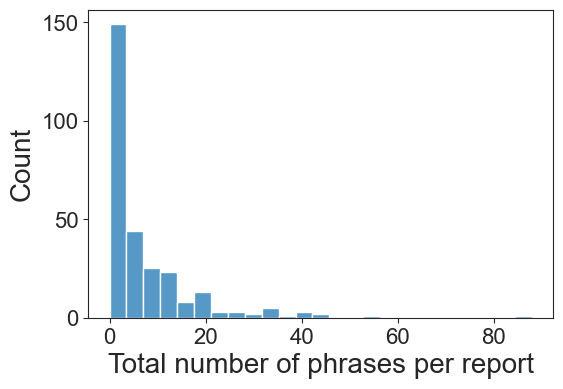

In [17]:
sns.histplot(x=df[feature_names].sum(axis=1), bins=25);
plt.xlabel("Total number of phrases per report");

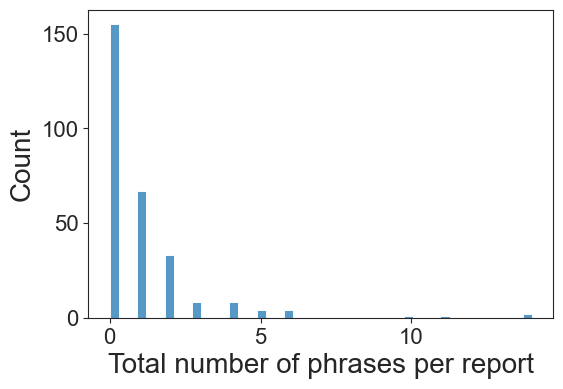

In [18]:
sns.histplot(x=df.FungalDescriptor);
plt.xlabel("Total number of phrases per report");

In [19]:
# Median number of annotations
df[feature_names].sum(axis=1).median()

2.0

In [20]:
# Median number of annotations among reports with at least one concept
df.loc[df[feature_names].sum(axis=1) > 0, feature_names].sum(axis=1).median()

5.0

In [21]:
# Number of reports with at least one occurence concept and relation
print("%d reports have at least one annotated concept." % df[utils.get_feature_names("concepts")].any(axis=1).sum())
print("%d reports have at least one annotated relation." % df[utils.get_feature_names("relations")].any(axis=1).sum())

259 reports have at least one annotated concept.
134 reports have at least one annotated relation.
